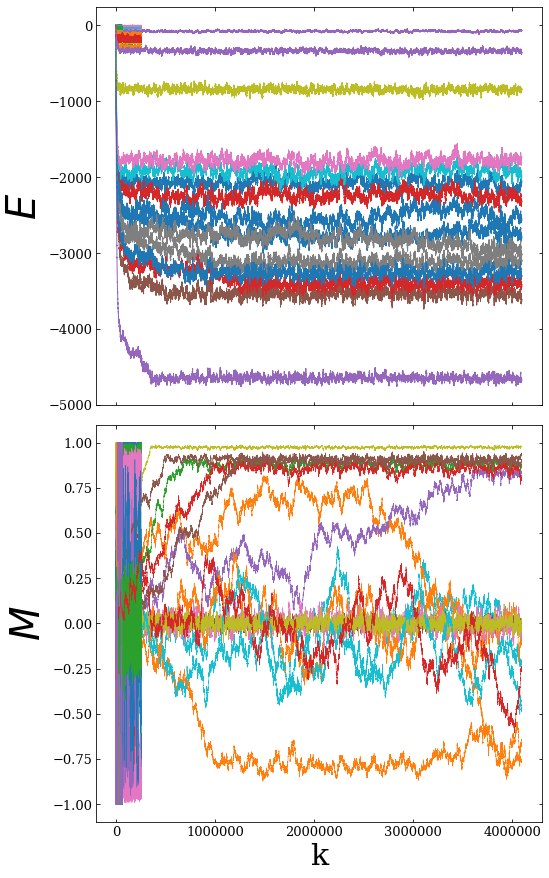

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import matplotlib.colors as colors
from matplotlib import *
import sys
from pylab import *
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
import scipy
#import pymc
from astropy.io import fits
import math
import os,glob
import matplotlib.patches as mpatches



mylist11 = []
mylist12 = []


plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
#mpl.rcParams['axes.labelsize'] = 18

fig = plt.figure(figsize=(8,15)) # Notice the equal aspect ratio


# equivalent but more general
ax1=plt.subplot(2,1, 2)#, gridspec_kw={"width_ratios":1})
ax2=plt.subplot(2,1, 1)#, gridspec_kw={"width_ratios":1}) 


fig.subplots_adjust(wspace=0, hspace=0.05)
#ax1.set_xlim(0.05,1.)
#ax1.set_ylim(2.2,2.6)
#ax2.set_xlim(0.05,1.)
#ax2.set_ylim(0.,0.7)
ax1.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.axes.xaxis.set_ticklabels([])
ax2.set_ylabel(r'$E$',fontsize=40)
ax1.set_ylabel(r'$M$',fontsize=40)
ax1.set_xlabel('k',fontsize=30)


folder_path = '/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/Data/1c/'
for filename in glob.glob(os.path.join(folder_path,'MMCMag'+'_'+'*.dat')):
    data = pd.read_table(filename, header=None, sep="\s+")
    kmag        =data.iloc[:,0]
    Mag         =data.iloc[:,1]
    x=kmag
    y=Mag
    ax1.plot(x, y, linewidth=0.5,label='_nolegend_')     
            
folder_path = '/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/Data/1c/'
for filename in glob.glob(os.path.join(folder_path,'MMCEn'+'_'+'*.dat')):
    dataDMO = pd.read_table(filename, header=None, sep="\s+")
    ken        =dataDMO.iloc[:,0]
    En         =dataDMO.iloc[:,1]


    x=ken
    y=En

    ax2.plot(x, y, linewidth=1.,ls='-',label='_nolegend_')
        


plt.savefig('/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/EryMagL.pdf', bbox_inches='tight', rasterized=True, dpi=300) ### for publication





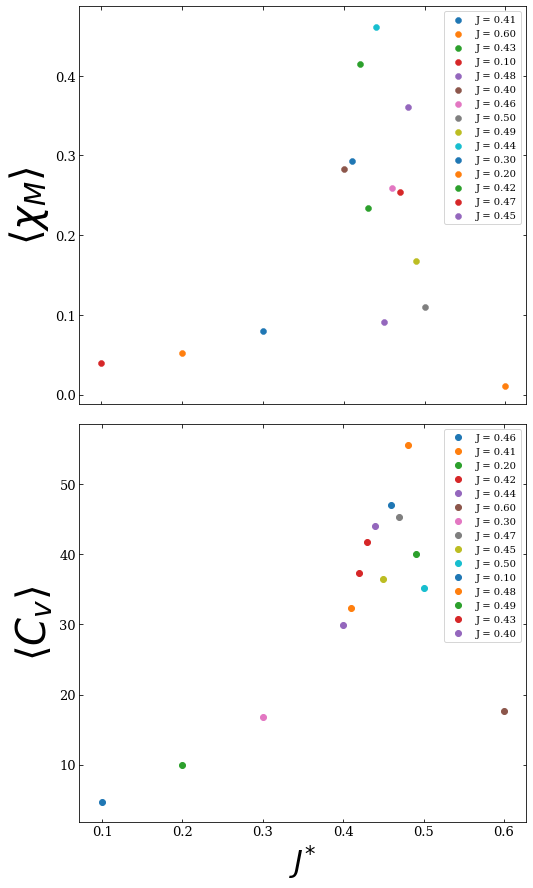

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import matplotlib.colors as colors
from matplotlib import *
import sys
from pylab import *
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
import scipy
#import pymc
from astropy.io import fits
import math
import os,glob
import matplotlib.patches as mpatches



mylist11 = []
mylist12 = []


plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
#mpl.rcParams['axes.labelsize'] = 18

fig = plt.figure(figsize=(8,15)) # Notice the equal aspect ratio


# equivalent but more general
ax1=plt.subplot(2,1, 1)#, gridspec_kw={"width_ratios":1})
ax2=plt.subplot(2,1, 2)#, gridspec_kw={"width_ratios":1}) 


fig.subplots_adjust(wspace=0, hspace=0.05)
#ax1.set_xlim(0.05,1.)
#ax1.set_ylim(2.2,2.6)
#ax2.set_xlim(0.05,1.)
#ax2.set_ylim(0.,0.7)
ax1.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax1.axes.xaxis.set_ticklabels([])
ax1.set_ylabel(r'$\left \langle \chi _{M} \right \rangle$',fontsize=40)
ax2.set_ylabel(r'$\left \langle C _{v} \right \rangle$',fontsize=40)
ax2.set_xlabel(r'$J^{*}$',fontsize=30)

L= np.array([10,18,66])

folder_path = '/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/Data/1c/'
for i in 2
    for filename in glob.glob(os.path.join(folder_path,'MMCMag_L='+str(L[i])+'_'+'*.dat')):
        filenameMag=filename.split('=')[1]
        J=filenameMag.split('_')[0]
        Lint=float(J)
        data = pd.read_table(filename, header=None, sep="\s+")
        data = data[data.iloc[:,0].between(20000, 1000000.,inclusive=True)]        #appended_data.append(data)
        kmag        =data.iloc[:,0]
        Mag         =data.iloc[:,1]
        x=kmag
        y=Mag
        MagStd=np.std(Mag)
        ax1.scatter(Jint, MagStd, linewidth=0.5,label=r'J = %.2f' %(Lint),color='k')     
    
            
    for filename in glob.glob(os.path.join(folder_path,'MMCEn_L='+str(L[i])+'_'+'*.dat')):
        filenameEn=filename.split('=')[1]
        Jen=filenameEn.split('_')[0]
        LEn=float(Jen)
        dataDMO = pd.read_table(filename, header=None, sep="\s+")
        dataDMO = dataDMO[dataDMO.iloc[:,0].between(20000, 1000000., inclusive=True)]        #appended_data.append(data)
        ken        =dataDMO.iloc[:,0]
        En         =dataDMO.iloc[:,1]
        ECv=np.std(En)

        x=ken
        y=En
    

        ax2.scatter(JEn, ECv, linewidth=1.,label=r'J = %.2f' %(LEn), color='k')
        
ax1.legend(fontsize=10.)
ax2.legend(fontsize=10.)



plt.savefig('/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/XCvL.pdf', bbox_inches='tight', rasterized=True, dpi=300) ### for publication





/home/pedro/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in power


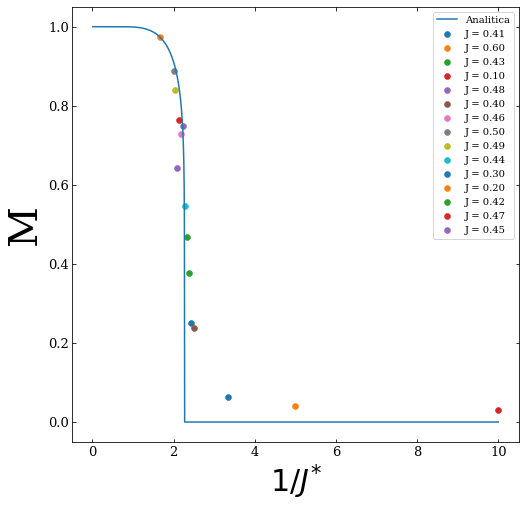

In [69]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import matplotlib.colors as colors
from matplotlib import *
import sys
from pylab import *
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
import scipy
#import pymc
from astropy.io import fits
import math
import os,glob
import matplotlib.patches as mpatches



mylist11 = []
mylist12 = []


plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
#mpl.rcParams['axes.labelsize'] = 18

fig = plt.figure(figsize=(8,8)) # Notice the equal aspect ratio


# equivalent but more general
ax1=plt.subplot(1,1, 1)#, gridspec_kw={"width_ratios":1})
#ax2=plt.subplot(2,1, 2)#, gridspec_kw={"width_ratios":1}) 


fig.subplots_adjust(wspace=0, hspace=0.05)
#ax1.set_xlim(0.05,1.)
#ax1.set_ylim(2.2,2.6)
#ax2.set_xlim(0.05,1.)
#ax2.set_ylim(0.,0.7)
ax1.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
#ax2.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax1.set_ylabel(r'M',fontsize=40)
#ax2.set_ylabel(r'$\left \langle C _{v} \right \rangle$',fontsize=40)
ax1.set_xlabel(r'$1/J^{*}$',fontsize=30)


folder_path = '/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/Data/'
for filename in glob.glob(os.path.join(folder_path,'MMCMag'+'_'+'*.dat')):
    filenameMag=filename.split('_')[2]
    J=filenameMag.split('=')[1]
    Jint=float(J)
    data = pd.read_table(filename, header=None, sep="\s+")
    data = data[data.iloc[:,0].between(20000, 1000000.,inclusive=True)]        #appended_data.append(data)
    kmag        =data.iloc[:,0]
    Mag         =data.iloc[:,1]
    x=kmag
    y=Mag
    MagStd=np.mean(np.absolute(Mag))
    ax1.scatter(1/Jint, MagStd, linewidth=0.5,label=r'J = %.2f' %(Jint))     
    
            
folder_path = '/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/Data/'
for filename in glob.glob(os.path.join(folder_path,'MMCEn'+'_'+'*.dat')):
    filenameEn=filename.split('_')[2]
    Jen=filenameEn.split('=')[1]
    JEn=float(Jen)
    dataDMO = pd.read_table(filename, header=None, sep="\s+")
    dataDMO = dataDMO[dataDMO.iloc[:,0].between(20000, 1000000., inclusive=True)]        #appended_data.append(data)
    ken        =dataDMO.iloc[:,0]
    En         =dataDMO.iloc[:,1]
    ECv=np.std(En)

    x=ken
    y=En
    

    #ax2.scatter(JEn, ECv, linewidth=1.,label=r'J = %.2f' %(JEn))

#ax2.legend(fontsize=10.)
x=np.arange(0.01,10.,0.00001)



Mteo=((1-np.sinh(2/x)**(-4))**(1./8.))*np.heaviside(-x+2.2691,0.00001)
Mteo=np.nan_to_num(Mteo)


ax1.plot(x,Mteo, linewidth=1.5,label='Analitica')
ax1.legend(fontsize=10.)

plt.savefig('/home/pedro/Escritorio/Fisica-Computacional-master/Metropolis/MagAnalit.pdf', bbox_inches='tight', rasterized=True, dpi=300) ### for publication



